# Analytic Form of Cosmic Fluxes

The analytical cosmic ray spectrum is based on [Phys. Atom. Nuclei 69, 1293–1298 (2006)](https://link.springer.com/article/10.1134/S1063778806080047).
The analytical form considers cosmic rays from 1 GeV/c to $10^5$ GeV/c.

Eq (1) in this paper is in unit of /($cm^2\cdot s\cdot sr$).  If integrating p from 1 to 1e5 GeV/c, at $\theta$ =0, we get 0.0076 muons from Eq (1), corresponding to 76 muons/($m^2\cdot s\cdot sr$), which matches the text describing the vertical flux.

In [1]:
# for creating a responsive plot
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
import scipy.integrate as integrate

## Use $\theta$ as a Variable

In [2]:
# Analytical cosmic ray flux from the paper
def dI_dpdtheta(theta, p):
    return 18/(p*np.cos(theta)+145)* (1./np.power((p+2.7/np.cos(theta)), 2.7))* (p+5)/(p+5/np.cos(theta))

In [3]:
# pBin = np.arange(1., 10000., 10.)
pBin = np.arange(1., 11., 0.1)
thetaBin = np.arange(0., np.pi/2, 0.008)
theta, p = np.meshgrid(thetaBin, pBin)
f = dI_dpdtheta(theta, p)*10000

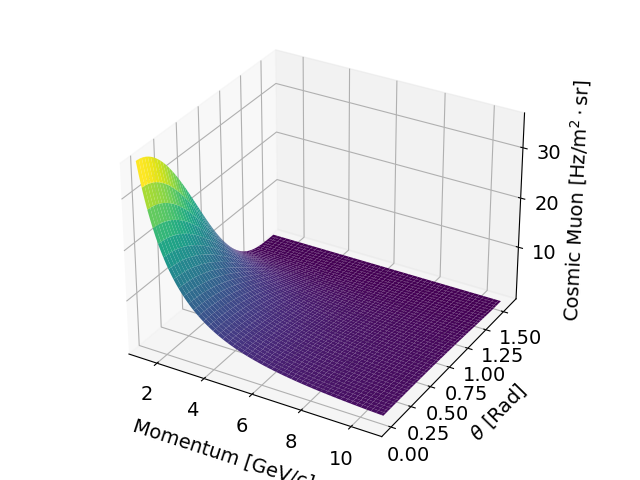

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
ax.plot_surface(p, theta, f, cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\theta$ [Rad]', fontsize = 14, labelpad = 10 )
ax.set_zlabel( r'Cosmic Muon [Hz/m$^2\cdot$sr]', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)

ax.set_xlim( [1, 11])
plt.tight_layout(w_pad = 0.1)

In [6]:
dI_dpdtheta_p1 = dI_dpdtheta(thetaBin, 1.)
dI_dpdtheta_p2 = dI_dpdtheta(thetaBin, 2.)
dI_dpdtheta_p4 = dI_dpdtheta(thetaBin, 4.)

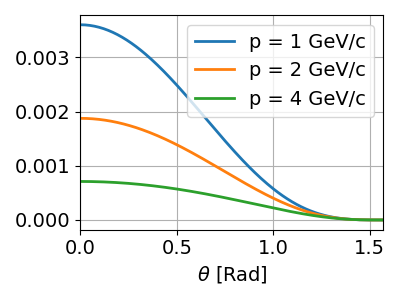

In [7]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.plot(thetaBin, dI_dpdtheta_p1, lw = 2, label = 'p = 1 GeV/c' )
ax.plot(thetaBin, dI_dpdtheta_p2, lw = 2, label = 'p = 2 GeV/c' )
ax.plot(thetaBin, dI_dpdtheta_p4, lw = 2, label = 'p = 4 GeV/c' )


ax.set_xlabel( r'$\theta$ [Rad]', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, np.pi/2])
# ax.set_ylim( [0, 1.1])

ax.grid(":")
ax.legend( fontsize = 14)
plt.tight_layout()

In [9]:
np.cos(0.5)

0.8775825618903728

## Use $\cos\theta$ as a Variable

In [8]:
# Analytical cosmic ray flux from the paper
def dI_dpdcosth(costh, p):
    return 18/(p*costh+145)* (1./np.power(p+2.7/costh, 2.7))* (p+5)/(p+5/costh)

In [9]:
# pBin = np.arange(1., 10000., 10.)
pBin = np.arange(1., 11., 0.1)
costhBin = np.arange(0.005, 1., 0.005)
costh, p = np.meshgrid(costhBin, pBin)
f = dI_dpdcosth(costh, p)*10000

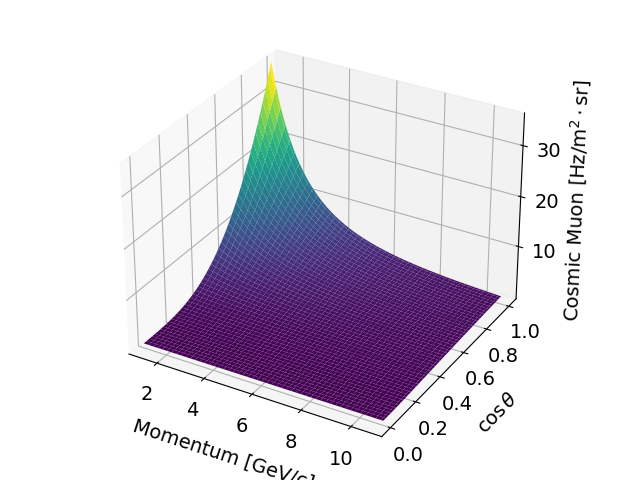

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
ax.plot_surface(p, costh, f, cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 14, labelpad = 10 )
ax.set_zlabel( r'Cosmic Muon [Hz/m$^2\cdot$sr]', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)

ax.set_xlim( [1, 11])
plt.tight_layout(w_pad = 0.1)

In [11]:
dI_dpdcosth_p1 = dI_dpdcosth(costhBin, 1.)
dI_dpdcosth_p2 = dI_dpdcosth(costhBin, 2.)
dI_dpdcosth_p4 = dI_dpdcosth(costhBin, 4.)
dI_dpdcosth_p10 = dI_dpdcosth(costhBin, 10.)

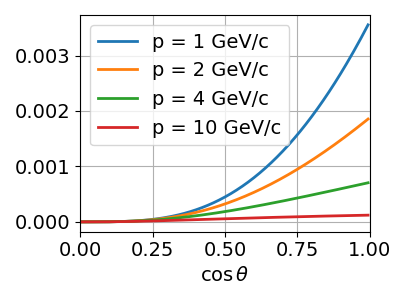

In [16]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.plot(costhBin, dI_dpdcosth_p1, lw = 2, label = 'p = 1 GeV/c' )
ax.plot(costhBin, dI_dpdcosth_p2, lw = 2, label = 'p = 2 GeV/c' )
ax.plot(costhBin, dI_dpdcosth_p4, lw = 2, label = 'p = 4 GeV/c' )
ax.plot(costhBin, dI_dpdcosth_p10, lw = 2, label = 'p = 10 GeV/c' )


ax.set_xlabel( r'$\cos\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 1])
# ax.set_ylim( [0, 1.1])

ax.grid(":")
ax.legend( fontsize = 14)
plt.tight_layout()

In [19]:
# The fraction of the six (p, costh) areas
pmins = np.array([1., 1., 2., 2., 4., 10.])
pmaxs = np.array([2., 2., 4., 4., 10., 10000.])
costhmins = np.array([0., 0.5, 0., 0.5, 0., 0.])
costhmaxs = np.array([0.5, 1., 0.5, 1., 1., 1.])
Is = np.array([
              integrate.dblquad(dI_dpdcosth, pmin, pmax, costhmin, costhmax)
              for pmin, pmax, costhmin, costhmax in zip(pmins, pmaxs, costhmins, costhmaxs) ])
Is

array([[4.64644323e-05, 1.18104498e-14],
       [6.57350877e-04, 9.54998544e-18],
       [6.62890781e-05, 2.49271358e-14],
       [6.63691325e-04, 7.36845390e-18],
       [7.13559963e-04, 2.99131045e-11],
       [4.79661416e-04, 3.34803625e-09]])

In [14]:
integrate.dblquad(dI_dpdcosth, 1, 10000, 0, 1)

(0.002627017092670161, 3.348598798090675e-09)

In [20]:
f.sum()

44492.4175392883